In [125]:
using LightGraphs, MetaGraphs
using Distributions
using Plots
using HCubature
using Combinatorics

In [ ]:
mg = initialize_regular_grid_graph_CT()
get_prop(mg,2,:n_delay)

In [137]:
mg = MetaGraph()
add_vertex!(mg,Dict(:x=>1))
add_vertex!(mg,Dict(:x=>2))
add_edge!(mg,1,2,:weight,1.0)

true

In [40]:
d = Gamma(4,1)

Gamma{Float64}(α=4.0, θ=1.0)

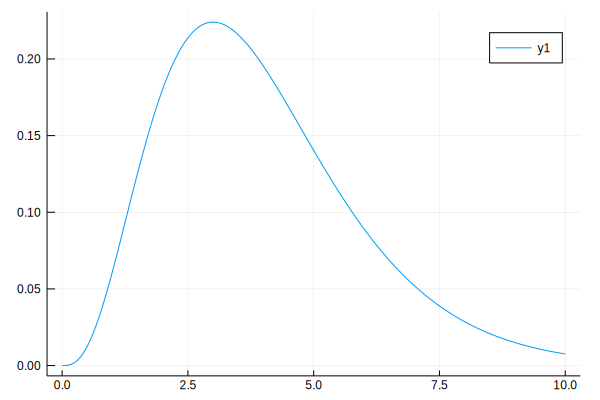

In [41]:
x = range(0,stop=10,length=1000)
y = [pdf(d,f) for f in x]
plot(x,y)

In [ ]:
for e in edges(mg)
    print(get_prop(mg,Edge(1,2),:weight))
end

In [ ]:
edges(mg)

In [ ]:
const GraphPath = Vector{Edge}
traversal_time(path::GraphPath) = sum([get_prop(path,e,:weight) for e in path])

In [ ]:
path = GraphPath()
path = Vector([e for e in edges(mg)])

In [ ]:
typeof(path)

In [ ]:
traversal_time(path)

In [ ]:
[get_prop(path,e,:weight) for e in path]

In [ ]:
mg = MetaGraph()
for k in range(50)
    add_vertex!(mg,Dict(:x=>k))
end
add_edge!(mg,1,2,:weight,1.0)
add_edge!(mg,5,6,:weight,1.0)

In [ ]:
for e in edges(mg)
    print(get_prop(mg,Edge(1,2),:weight))
end

In [ ]:
factorial(5)

In [ ]:
1^3*5

In [148]:
function get_collision_probability(n1,t1,n2,t2,nn,t_delay,lambda)
        
    function f(x)
        y = x[1]
        t = x[2]
        #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * lambda^(n1+n2) *  (t)^(n1-1) * (y+t)^(n2-1) * exp(-lambda*(y+2*t)) / (factorial(n1-1)*factorial(n2-1))
        #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * (lambda^(n1) * (t)^(n1-1)  * exp(-lambda*(y+2*t)) / factorial(n1-1))*(lambda^(n2) * (y+t)^(n2-1)/factorial(n2-1))
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1+y))) * pdf(Gamma(n1,lambda), t) * pdf(Gamma(n2,lambda),t-y)
        return density
    end
    
    function g(x)
        y = x[1]
        t = x[2]
        #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * lambda^(n1+n2) *  (t)^(n1-1) * (y+t)^(n2-1) * exp(-lambda*(y+2*t)) / (factorial(n1-1)*factorial(n2-1))
        #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * (lambda^(n1) * (t)^(n1-1)  * exp(-lambda*(y+2*t)) / factorial(n1-1))*(lambda^(n2) * (y+t)^(n2-1)/factorial(n2-1))
        density = (1-cdf(Gamma(nn,lambda),abs(t2-t1+y))) * pdf(Gamma(n1,lambda), t+y) * pdf(Gamma(n2,lambda),t)
        return density
    end
    
    a = [-1000.0;0.0]
    b = [0.0,1000.0]
    m = [0.0;0.0]
    n = [1000.0,1000.0]
    C1,err1 = hcubature(f,a,b)
    C2,err2 = hcubature(g,m,n)
    C = C1 + C2
    err = err1 + err2
    
    return C, err

end

get_collision_probability (generic function with 1 method)

In [149]:
n1 = 2
t1 = 1
n2 = 3
t2 = 2
nn = 5
t_delay = 0
lambda = 1

1

In [150]:
get_collision_probability(n2,t2,n1,t1,nn,t_delay,lambda)

(0.9101047231574282, 1.353667710724611e-8)

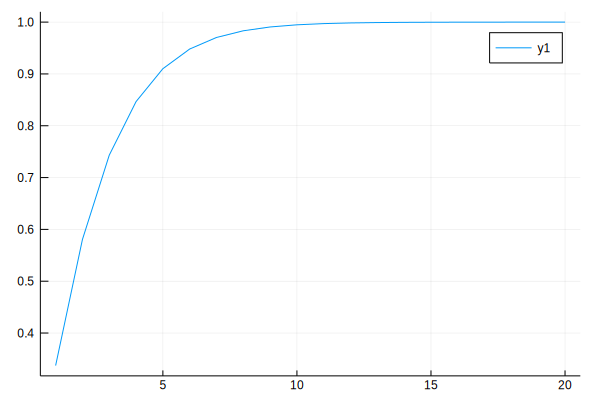

In [151]:
nns = 1:20
cp = [get_collision_probability(n1,t1,n2,t2,nnx,t_delay,lambda)[1] for nnx in nns]
plot(nns,cp)

In [ ]:
function d1(z)
    return lambda^nn * z[1]^(nn-1) * exp(-lambda*z[1]) / factorial(nn-1)
end

function f(x)
    y = x[1]
    t = x[2]
    #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * lambda^(n1+n2) *  (t)^(n1-1) * (y+t)^(n2-1) * exp(-lambda*(y+2*t)) / (factorial(n1-1)*factorial(n2-1))
    #density = hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * (lambda^(n1) * (t)^(n1-1)  * exp(-lambda*(y+2*t)) / factorial(n1-1))*(lambda^(n2) * (y+t)^(n2-1)/factorial(n2-1))
    density = (1-cdf(Gamma(nn,lambda),abs(t2-t1+y))) * pdf(Gamma(n1,lambda), t) * pdf(Gamma(n2,lambda),t+y)
    return density
end

In [ ]:
yx = 15

hcubature(d1,[t2-t1+yx],[100000],rtol = 0.1)[1]

In [ ]:
f([100,100])

In [ ]:
a = [0;0]
b = [100;-100]
hcubature(f,a,b,rtol = 1.0)

In [ ]:
1/0.4

In [ ]:
y = 16
t=3

hcubature(d1,[t2-t1+y],[1000],rtol = 0.5)[1] * lambda^(n1+n2) *  (t)^(n1-1) * (y+t)^(n2-1) * exp(-lambda*(y+2*t)) / (factorial(n1-1)*factorial(n2-1))

In [8]:
my_tuple = (1,2)

(1, 2)

In [11]:
my_dict::Dict{Tuple,Float64} = Dict{Tuple,Float64}()

ErrorException: syntax: type declarations on global variables are not yet supported

In [122]:
md = Dict()
md[1] = 2
md[13] = 5
md[34] = 12

12

In [123]:
for k in keys(md)
    print(k,"\n")
end

13
34
1


In [154]:
l = collect(combinations([1,2,3,4,5],[6,7,8]))

MethodError: MethodError: no method matching combinations(::Array{Int64,1}, ::Array{Int64,1})
Closest candidates are:
  combinations(::Any) at /home/peltzer/.julia/packages/Combinatorics/Utkwu/src/combinations.jl:62
  combinations(::Any, !Matched::Integer) at /home/peltzer/.julia/packages/Combinatorics/Utkwu/src/combinations.jl:48

In [130]:
(a,b) = l[1]

2-element Array{Int64,1}:
 1
 2

In [132]:
b

2

In [140]:
collect(edges(mg))[1]

Edge 1 => 2

In [153]:
Edge(2,1)

Edge 2 => 1